| **Inicio** | **atrás 3** | **Siguiente 5** |
|----------- |-------------- |---------------|
| [🏠](../README.md) | [⏪](./3_Decision_Tree.ipynb)| [⏩](./5_Cross_Validation.ipynb)|

# **4. Bias Variance trade off**

![Bias Variance trade off](../img/Bias_Variance.png "Bias Variance trade off")

La trade-off entre sesgo (bias) y varianza es un concepto fundamental en el aprendizaje automático. Se refiere al equilibrio que se debe encontrar al desarrollar un modelo entre dos fuentes principales de error: el sesgo y la varianza. Entender este trade-off es esencial para crear modelos que generalicen bien a datos no vistos.

**Sesgo (Bias):**

- **Definición:** El sesgo se refiere al error sistemático introducido por la aproximación de un modelo a un problema subyacente demasiado simplificado.

- **Características:** Modelos con alto sesgo tienden a ser demasiado simples y a no capturar la complejidad del problema.

- **Efectos:** Altos niveles de sesgo pueden llevar a subajuste (underfitting), lo que significa que el modelo no se ajusta adecuadamente a los datos de entrenamiento ni generaliza bien a datos no vistos.

**Varianza:**

- **Definición:** La varianza se refiere a la sensibilidad del modelo a pequeñas variaciones en los datos de entrenamiento.

- **Características:** Modelos con alta varianza se ajustan demasiado a los datos de entrenamiento y capturan el ruido en lugar del patrón subyacente.

- **Efectos:** Altos niveles de varianza pueden llevar a sobreajuste (overfitting), lo que significa que el modelo se ajusta demasiado a los datos de entrenamiento y no generaliza bien a datos no vistos.

**Trade-Off Sesgo-Varianza:**

- **Objetivo:** Encontrar el equilibrio adecuado entre sesgo y varianza para obtener un modelo que se ajuste bien a los datos de entrenamiento y generalice bien a datos nuevos.

- **Fórmula Matemática:**

  $\text{Error Total} = \text{Sesgo}^2 + \text{Varianza} + \text{Ruido Irreducible}$

- **Interpretación:** Al disminuir el sesgo, se puede aumentar la varianza, y viceversa. El objetivo es minimizar el error total, que es la suma del sesgo al cuadrado, la varianza y el ruido irreducible.

**Ejemplo con Gráficos en Python:**

Vamos a ilustrar el trade-off sesgo-varianza utilizando un ejemplo sencillo con un modelo polinómico. Utilizaremos la biblioteca scikit-learn para generar datos, entrenar modelos y visualizar el trade-off.

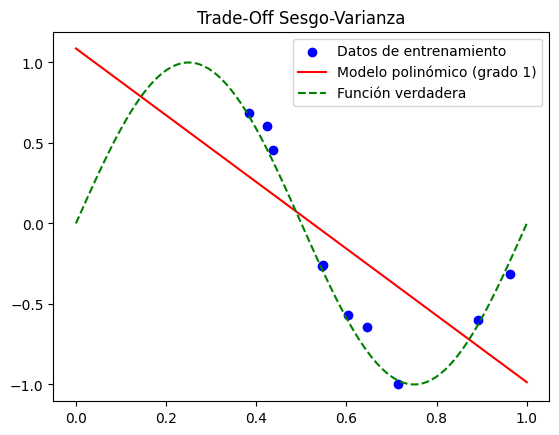

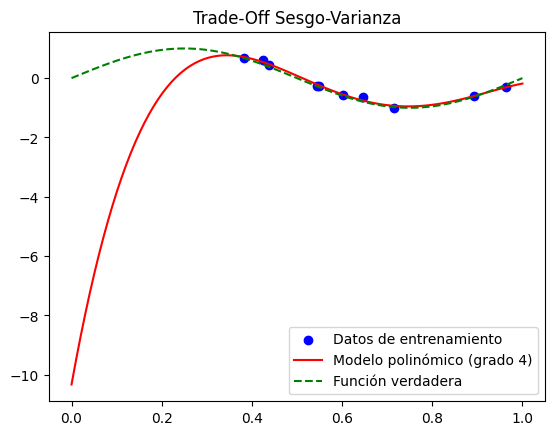

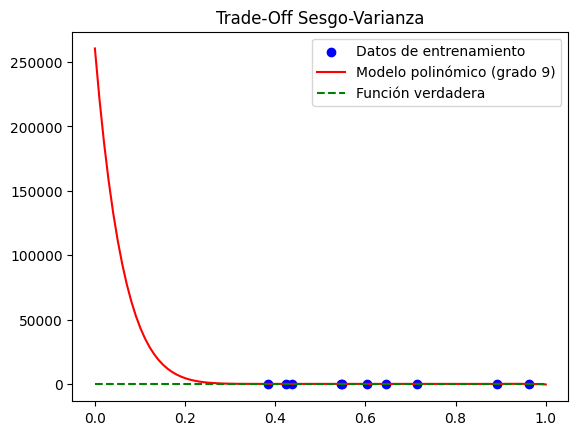

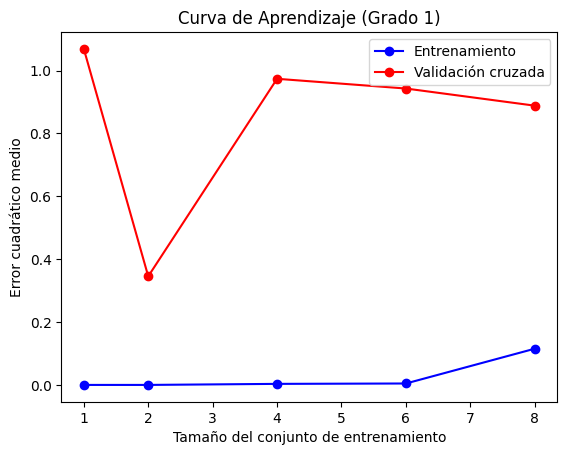

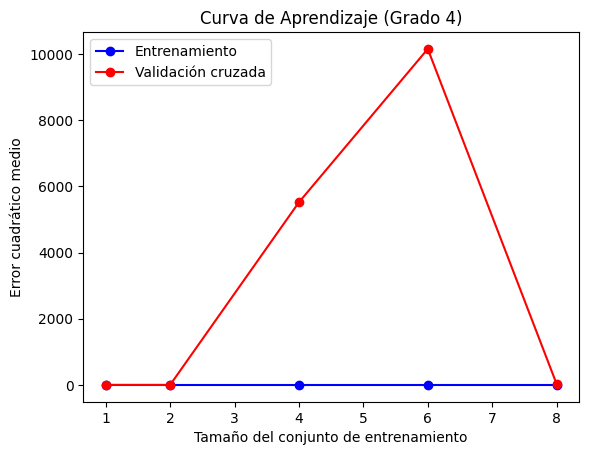

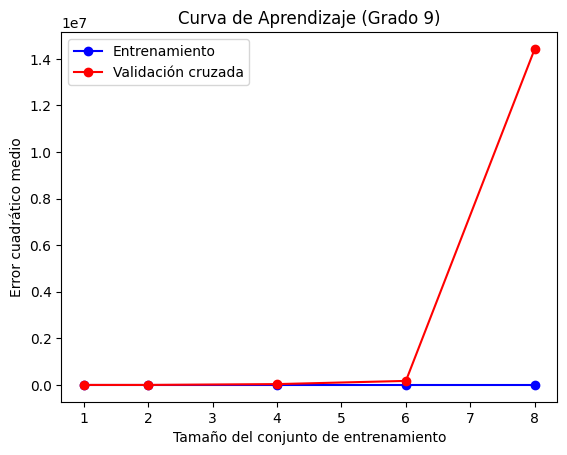

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve

# Función para generar datos sintéticos
def true_function(X):
    return np.sin(2 * np.pi * X)

# Generar datos sintéticos
np.random.seed(0)
X_train = np.sort(np.random.rand(10))
y_train = true_function(X_train) + np.random.randn(10) * 0.1
X_test = np.linspace(0, 1, 100)
y_test = true_function(X_test) + np.random.randn(100) * 0.1

# Función para entrenar y visualizar modelos polinómicos
def fit_and_plot_polynomial(degree):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train[:, np.newaxis], y_train)
    y_pred = model.predict(X_test[:, np.newaxis])
    
    plt.scatter(X_train, y_train, color='blue', label='Datos de entrenamiento')
    plt.plot(X_test, y_pred, color='red', label=f'Modelo polinómico (grado {degree})')
    plt.plot(X_test, true_function(X_test), color='green', linestyle='--', label='Función verdadera')
    plt.title('Trade-Off Sesgo-Varianza')
    plt.legend()
    plt.show()

# Probar diferentes grados de polinomios
degrees = [1, 4, 9]
for degree in degrees:
    fit_and_plot_polynomial(degree)

# Función para visualizar curvas de aprendizaje
def plot_learning_curve(model, title):
    train_sizes, train_scores, test_scores = learning_curve(model, X_train[:, np.newaxis], y_train, cv=5, scoring='neg_mean_squared_error')
    train_scores_mean = -np.mean(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)
    
    plt.figure()
    plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Entrenamiento')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='red', label='Validación cruzada')
    plt.xlabel('Tamaño del conjunto de entrenamiento')
    plt.ylabel('Error cuadrático medio')
    plt.title(title)
    plt.legend()
    plt.show()

# Visualizar curvas de aprendizaje para diferentes grados de polinomios
for degree in degrees:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    plot_learning_curve(model, f'Curva de Aprendizaje (Grado {degree})')

En este ejemplo, se generan datos sintéticos a partir de una función seno y se ajustan modelos polinómicos de diferentes grados. La visualización muestra cómo modelos con bajo grado (sesgo alto) no capturan la complejidad de los datos, mientras que modelos con alto grado (varianza alta) se ajustan demasiado a los datos de entrenamiento. Además, se presentan curvas de aprendizaje para evaluar el rendimiento del modelo en función del tamaño del conjunto de entrenamiento, lo que proporciona información sobre sesgo y varianza.

### **Ejemplo**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Crear un DataFrame sintético
data = {'X': np.linspace(-5, 5, 50),
        'Y': 3 * np.linspace(-5, 5, 50) + np.random.normal(0, 5, 50)}
df = pd.DataFrame(data)
df

,X,Y
0,-5.000000,-13.196888
1,-4.795918,-3.618069
2,-4.591837,-19.709649
3,-4.387755,-9.813515
4,-4.183673,-22.056490
5,-3.979592,-16.451100
6,-3.775510,-19.124102
7,-3.571429,-7.693601
8,-3.367347,-5.516668
9,-3.163265,-10.921875


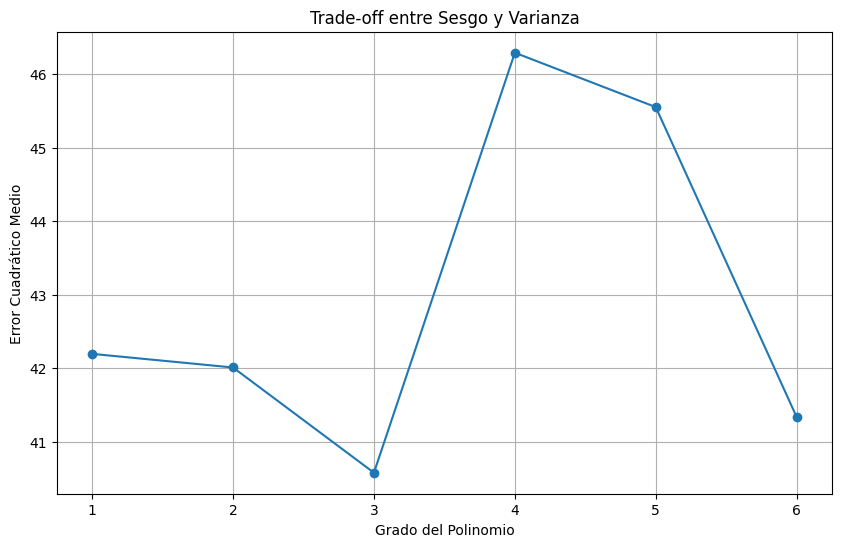

In [2]:
# Separar las características (X) y las etiquetas (Y)
X = df[['X']]
y = df['Y']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Función para entrenar un modelo polinómico de un grado dado
def train_polynomial_model(degree):
    # Transformar las características a polinómicas
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Inicializar y entrenar el modelo de regresión lineal
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Realizar predicciones en el conjunto de prueba
    y_pred = model.predict(X_test_poly)

    # Calcular el error cuadrático medio en el conjunto de prueba
    mse = mean_squared_error(y_test, y_pred)

    return mse

# Grados de polinomios para probar
degrees = [1, 2, 3, 4, 5, 6]

# Entrenar modelos y almacenar los errores cuadráticos medios
mse_values = [train_polynomial_model(degree) for degree in degrees]

# Visualizar el trade-off entre sesgo y varianza
plt.figure(figsize=(10, 6))
plt.plot(degrees, mse_values, marker='o')
plt.title('Trade-off entre Sesgo y Varianza')
plt.xlabel('Grado del Polinomio')
plt.ylabel('Error Cuadrático Medio')
plt.grid(True)
plt.show()

| **Inicio** | **atrás 3** | **Siguiente 5** |
|----------- |-------------- |---------------|
| [🏠](../README.md) | [⏪](./3_Decision_Tree.ipynb)| [⏩](./5_Cross_Validation.ipynb)|